## Codificação de Sinais Multimédia
<br>
>###  Trabalho Prático 3 - Implementação do algoritmo de compressão JPEG <hr>
> <span style="font-family: Helvetica; font-size: 1em;"> 33104 Tiago Oliveira</span><br>
> <span style="font-family: Helvetica; font-size: 1em;"> 39758 André Fonseca</span><br>
> <span style="font-family: Helvetica; font-size: 1em;"> 43254 Pedro Costa</span><br><hr>


In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import os
print(os.path.isfile('/content/drive/My Drive/CSM/isel_leim_csm_1819/projects/P03/sketches/PP03/notebooks/figures/lenargb.png'))


True


<hr><br><h2> Índice </h2>
<h3>[1 - Introdução](#intro)</h3>
<h3>[2 - Chroma Subsampling e Transformação do Espaço de Cores](#subsampling)</h3>
<h3>[3 - DCT e DCT Inversa](#dct)</h3>
<h3>[4 - Quantização](#quant)</h3>
<h3>[5 - Codificação Entrópica](#entropica)</h3>
<h3>[6 - SNR e Taxa de Compressão](#snr)</h3>
<h3>[7 - Conclusões](#conclusoes)</h3>

<hr><br><h2>Introdução</h2><br>
<a name="intro"></a>
<p>&emsp;&emsp; Com o processo de digitalização da fotografia, depressa houve a necessidade de encontrar uma solução para poder armazenar esta informação dado que os ficheiros produzidos por formatos raw eram demasiado grandes para poderem ser armazenados em grandes quantidades ou simplesmente para poderem ser usados em websites. O algoritmo de compressão JPEG nasce da necessidade de armazenar ou partilhar ficheiros de imagem reduzindo informação redundante ou informação que devido a limitações do sistema visual humano, nunca chega a ser interpretada. </p>
<p>&emsp;&emsp; Os seres humanos são consideravelmente sensíveis a pequenas variações na intensidade de luz, contudo tal precisão não se verifica quando se trata de pequenas variações na cor observada. Isto acontece porque o sistema visual humano é constituído maioritariamente por bastonetes (recetores sensíveis à luminosidade) que por sua vez são aproximadamente mil vezes mais sensíveis à luz do que os cones, recetores de um determinado tipo de comprimento de onda usados para interpretação da cor. </p>
<p>&emsp;&emsp; O algoritmo de compressão JPEG depende desta analise ao sistema visual humano, tratando a cor como informação de menos importância quando comparado à intensidade de luz, neste caso representado numa imagem pela sua representação em tons de cinzento.</p>
<p>&emsp;&emsp; A implementação do processo de compressão JPEG será feito utilizando classes em python que irão permitir uma melhor modelação e modularização na resolução do problema</p>

<hr><br><h2>Chroma Subsampling e Transformação do Espaço de Cores</h2><br>
<a name="subsampling"></a>
<p>&emsp;&emsp; O espaço de cores RGB é ideal para mostrar e manipular imagens em ecrãs e outros dispositivos digitais já que normalmente num monitor por exemplo um pixel é composto por três leds distintos, vermelho (R), verde (G) e azul (B). O mesmo acontece nos sensores das câmaras digitais que decompõe a luz nos seus componentes fundamentais. </p>

<br><img src="/content/drive/My Drive/CSM/isel_leim_csm_1819/projects/P03/sketches/PP03/notebooks/figures/lenargb.png" style="height:353px; width:860px;"><br>

<p>&emsp;&emsp; Por outro lado, os seres humanos são muito mais sensíveis às variações da intensidade da luz do que variações no espectro de luz visível e por isso pequenas variações de cor podem ser impercetíveis ao olho humano. O estudo dos diferentes órgãos sensoriais humanos permitiu não só na visão, mas também no caso do som (MP3 e outros formatos de compressão), criar algoritmos de compressão que permitissem armazenar e transmitir conteúdos multimédia que de outra forma não seria prático ou mesmo impossível de fazer.</p>

<p>&emsp;&emsp; O primeiro passo da compressão de uma imagem usando o algoritmo JPEG, é transformar o espaço de cores desta de maneira a que se consiga extrair a informação da luminosidade para um componente separado dos componentes de cor, usando assim as limitações do cérbero a nosso favor. O espaço de cores que permite esta separação é designado por YCbCr e separa o componente de luminosidade Y (luma) dos componentes de cor Cb e Cr (chroma) constituídos pela diferença entre os componentes de cor azul e vermelho e o componente de luma, respetivamente. </p>

<p>&emsp;&emsp; Podemos observar no seguinte exemplo, a imagem que iremos comprimir, nas suas componentes Y Cb e CR: </p>

<br><img src="/content/drive/My Drive/CSM/isel_leim_csm_1819/projects/P03/sketches/PP03/notebooks/figures/lenaycbcr.png" style="height:327px; width:860px;"><br>

<p>&emsp;&emsp; É possível observar que os componentes de cor não apresentam grande variação na distribuição das cores que os constituem sendo possível por isso reduzir significativamente a gama de cores contida nos componentes usando uma técnica designada por chroma subsampling que consiste em mapear o valor de um pixel para os pixels na sua vizinhança mais próxima sem alterar os pixels que já sofreram alterações previamente, reduzindo assim a gama de cores em 50% ou mais dependendo do ratio usado. No presente trabalho será adotado o ratio 4:2:2 sendo este o standard utilizado, podemos observar na seguinte figura um exemplo da diferença de resolução dada por esta solução:</p>

<br><img src="/content/drive/My Drive/CSM/isel_leim_csm_1819/projects/P03/sketches/PP03/notebooks/figures/subsampling.png" style="height:251px; width:809px;"><br>

<p>&emsp;&emsp; Este processo não é lossless e por isso após o subsampling não é possível reverter o processo.</p>


<hr><br><h2>DCT e DCT Inversa</h2><br>
<a name="dct"></a>
<p>&emsp;&emsp; Após a transformação do espaço de cor da imagem, observa-se que as componentes que constituem a imagem, têm blocos de cor que estão bastante correlacionados, sendo essa correlação mais notória quando se observa pequenos blocos de 8x8. Como é sabido o ser humano não consegue distinguir muito bem diferenças na cor quanto esta varia a altas frequências, sendo essas cores assumidas pelo nosso cérbero como apenas uma. </p> 

<p>&emsp;&emsp; A transformada DCT vai transformar a informação contida no bloco 8x8, do domínio do espaço para o domínio da frequência tirando assim partido das limitações do nosso cérbero. A matriz que resulta da transformação dct pode ser facilmente compreendida de forma análoga a um som que é constituído por uma frequência fundamental e diversas frequências harmónicas. </p>
 
<br><img src="./figures/dctpatterns.png", style="height:412px; width:860px;"><br>

<p> &emsp;&emsp;No canto superior esquerdo o primeiro elemento obtido é a cor fundamental do bloco e que será designado de componente DC, os outros valores do bloco representam a variação respetiva da cor fundamental, estes valores vão ser designados de coeficientes AC e serão usados na função inversa para reconstruir o bloco com um determinado padrão oscilatório. Na essência a matriz resultante de coeficientes AC e DC corresponde aos fatores de peso que cada padrão oscilatório tem no bloco original. Podemos observar, que os elementos do canto superior esquerdo têm valores mais elevados do que o canto inferior direito, isto acontece porque à medida que fazemos zoom numa imagem há uma grande probabilidade dos pixéis não apresentarem uma grande variação na cor quando comparados com os seus vizinhos. Estes fatores são multiplicados por cossenos que são somados criando a combinação única de intensidades de cada pixel contida no bloco original</p>

<p>&emsp;&emsp; A imagem seguinte mostra um exemplo de uma soma de dois cossenos e o respetivo resultado de um possível bloco:</p>

<br><img src="./figures/cossinesum.png", style="height:289px; width:860px;"><br>

<p>&emsp;&emsp; Contudo aplicar apenas a DCT não constitui só por si uma boa compressão do bloco original, para isso, e mais uma vez tirando partido do facto do nosso cérbero não conseguir distinguir diferenças de cor quando estas se apresentam a altas frequências, é usado um processo quantificação que vai eliminar a maior parte dos padrões de alta frequência, isto é, os fatores que se apresentam no canto inferior direito do bloco.</p>



<hr><br><h2>Quantização</h2><br>
<a name="quant"></a>
<p>&emsp;&emsp; Como foi referido em cima, o nosso cérebro não consegue processar variações de cor de alta frequência e por isso podemos remover os componentes AC que correspondem às frequências mais altas. Tal processo é conseguido usando uma tabela de quantização standard que vai reduzir a gama dinâmica dos valores contidos no bloco, tendo mais impacto no canto inferior direito da matriz que é onde se encontram os coeficientes de alta frequência. Dividindo os valores da tabela de quantização por os valores do bloco arredondando ao inteiro mais próximo, obtém-se um bloco cujos valores predominantes são os fatores das baixas frequências:</p>

<br><img src="./figures/quanttable.png", style="height:402px; width:860px;"><br>

<p>&emsp;&emsp; É neste ponto do algoritmo de compressão JPEG onde acontecem a maior parte das perdas de informação, pois uma vez que o valor é arredondado para o inteiro mais próximo, não é possível reverter para os valores originais. Isto não irá constituir um problema pois a diferença entre os valores originais e os valores descodificados será muito reduzida, sendo possível reduzir ainda mais essa diferença se multiplicarmos a matriz de quantificação por um fator de escala.</p>

In [0]:
import tests
tests.test_quantification()

Original block: 
[[1337   56  -27   18   78  -60   27  -27]
 [ -38  -27   13   44   32   -1  -24  -10]
 [ -20  -17   10   33   21   -6  -16   -9]
 [ -10   -8    9   17    9  -10  -13    1]
 [  -6    1    6    4   -3   -7   -5    5]
 [   2    3    0   -3   -7   -4    0    3]
 [   4    4   -1   -2   -9    0    2    4]
 [   3    1    0   -4   -2   -1    3    1]]

[INFO] Encoding
Encoded block: 
[[84  5 -3  1  3 -2  1  0]
 [-3 -2  1  2  1  0  0  0]
 [-1 -1  1  1  1  0  0  0]
 [-1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]

[INFO] Decoding
Decoded block: 
[[ 1344.    55.   -30.    16.    72.   -80.    51.     0.]
 [  -36.   -24.    14.    38.    26.     0.     0.     0.]
 [  -14.   -13.    16.    24.    40.     0.     0.     0.]
 [  -14.     0.     0.    29.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.]
 [    0.     0.     0.     0.     0.     0.     0.     0.]
 

<hr><br><h2>Codificação Entrópica</h2><br>
<a name="entropica"></a>

<p>&emsp;&emsp; Como é possível observar, a maior parte dos valores dos blocos quantizados é zero e por isso a imagem processada contém muita informação redundante que pode ser compactada de modo a melhorar a taxa de compressão.</p>

<p>&emsp;&emsp;Dado que os blocos quantizados contêm dois tipos de informação distintos, o componente DC e os componentes AC, estes serão tratados de maneira diferente. Os componentes DC são valores relativamente altos e ao comparar blocos adjacentes conclui-se que os valores de DC não variam muito de bloco para bloco. Por essa razão ao invés de enviar os valores na sua totalidade, aplica-se uma codificação DPCM guardando apenas o valor da componente DC do primeiro bloco e posteriormente para os blocos seguintes, a diferença entre o bloco atual e o bloco anterior, reduzindo significativamente a gama dinâmica de valores a serem guardados. A escrita dos bits no bitstream será feita usando uma tabela que indica quantos bits terão de ser lidos de modo a obter o valor codificado correto:</p>

<br><img src="./figures/huffdc.png", style="height:200px; width:300px;"><br>

<p>&emsp;&emsp; Os componentes AC vão sofrer uma compressão ainda mais drástica, isto porque a maior parte dos componentes AC contidos no bloco têm valor zero o que permite aplicar com eficácia uma codificação do tipo RLC, agrupando os componentes AC a zero e reduzindo assim drasticamente o número de bits necessários para guardar a informação. Os componentes AC, ou seja, os valores non zero value, serão codificados do mesmo modo que os componentes DC usando a tabela de {size, amplitude}. Para garantir que agrupamos o maior número de zeros os componentes AC serão codificados em "zig-zag" garantindo que os valores do canto superior esquerdo (componentes de baixas frequências) são codificados primeiro deixando para o fim os componentes AC a zero que podem ser facilmente agrupados garantindo uma compressão ótima: </p>

<br><img src="./figures/zigzag.png", style="height:306px; width:306px;"><br>

In [0]:
tests.test_block()


[INFO] Encoding blocks
Stream 0: 11110010100001100011010
Stream 1: 000101000011010
Stream 2: 01111000010001111010111010

[INFO] Decoding streams
Current stream: 1111001010000110001101000010100001101001111000010001111010111010
Decoded DC: (7, 80)
Decoded AC:  (1, 1)(1)
Current stream: 00010100001101001111000010001111010111010
Decoded DC: (0, 0)
Decoded AC:  (0, 2)(2)(0, 1)(1)
Current stream: 01111000010001111010111010
Decoded DC: (2, -2)
Decoded AC:  (0, 1)(1)(0, 1)(1)(3, 1)(-1)

[INFO] Decoding blocks
Decoded Block 0: 
[[80  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
Decoded Block 1: 
[[80  2  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
Decoded Block 2: 
[[78

<hr><br><h2>SNR e Taxa de Compressão</h2><br>
<a name="snr"></a>
<p>&emsp;&emsp; Ao fazer a codificação completa do algoritmo de compressão JPEG é possível comparar a imagem obtida com a original analisando a relação de sinal ruido, assim como a taxa de compressão obtida. É possível observar no exemplo em baixo, que quando comparada com a imagem em formato TIFF, a imagem JPEG obtida é 53.67% mais pequena que a original conseguindo assim reduzir o tamanho da imagem para mais de metade do tamanho original. Por outro lado, a algoritmo implementado na biblioteca OpenCV consegue obter uma taxa de compressão de aproximadamente 71% sendo por isso bastante mais eficiente que o algoritmo implementado no presente trabalho.</p>
<p>&emsp;&emsp; A relação de sinal-ruído considerada normal para uma imagem comprimida situa-se entre os 30dB e os 50dB e como podemos observar o valor obtido pelo algoritmo implementado encontra-se nessa gama de valores e bastante próximo do valor obtido quando é usado o OpenCV</p>

Original Imagem vs. Implemented JPEG Algorithm: 

Reading from file: ../data/raw/Lena.tif
Encoding image with JPEG
Encoding time: 3.06 seconds
Decoding stream
Decoding time: 14.3 seconds
Writing to file: ../data/processed/Lena
SNR = 34.17 dB
Compression Ratio = 2.16:1
Compression % = 53.67%


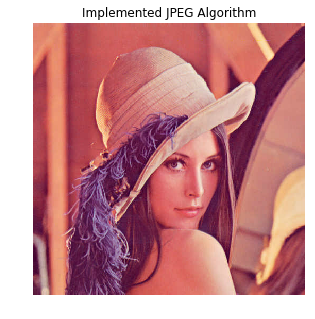


 
OpenCV JPEG Algorithm vs. Implemented JPEG Algorithm: 

Reading from file: ../data/raw/Lena.tif
SNR = 38.02 dB
Compression Ratio = 3.43:1
Compression % = 70.82%


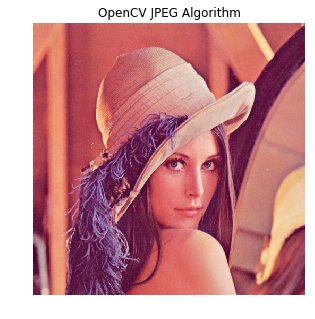

In [0]:
tests.test_jpeg(50, 1, 1)
tests.test_jpeg_cv2(50)

<hr><br><h2>Conclusões</h2>
<a name="conclusoes"></a>
<p>&emsp;&emsp;O estudo e implementação do algoritmo de compressão JPEG permitiu desenvolver uma nova perspetiva na compreensão daquilo que pode ser considerado informação útil ou informação redundante. Perceber as limitações dos sistemas sensoriais humanos, permite o desenvolvimento de algoritmos extremamente eficientes que moldam e manipulam a informação bruta (raw) e a transformam em informação que percetivelmente não difere do conteúdo original. A implementação destes algoritmos de compressão são os principais pilares de uma era onde a informação, em particular audiovisual, é criada a um ritmo maior do que é consumida. A explosão de conteúdos audiovisuais na web por exemplo, só foi possível graças à implementação de algoritmos de compressão que reduzem substancialmente a quantidade de informação redundante para um ser humano e que por isso reduz drasticamente o espaço necessário ao armazenamento destes conteúdos.</p>
<p>&emsp;&emsp; O algoritmo implementado no presente trabalho, mostra que é possível obter uma imagem que é percetivelmente muito parecida ao original, mas com menos de metade do tamanho. Contudo também é possível concluir que o algoritmo implementado ainda está um pouco longe dos valores obtidos pelo OpenCV. </p>